# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [2]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [3]:
goal_state = [

# Level 1
[
    [33, 22, 113, 42, 105],
    [2, 89, 106, 19, 99],
    [85, 82, 4, 119, 25],
    [98, 90, 6, 112, 9],
    [97, 32, 86, 23, 77]
],
# Level 2
[
    [95, 80, 111, 11, 18],
    [91, 55, 65, 69, 35],
    [16, 66, 70, 53, 110],
    [5, 68, 54, 67, 121],
    [108, 46, 15, 115, 31]
],
# Level 3
[
    [100, 17, 48, 34, 116],
    [114, 75, 52, 62, 12],
    [83, 50, 63, 76, 43],
    [8, 64, 74, 51, 118],
    [10, 109, 78, 92, 26]
],
# Level 4
[
    [38, 102, 3, 125, 47],
    [81, 59, 72, 58, 45],
    [30, 73, 56, 60, 96],
    [87, 57, 61, 71, 39],
    [79, 24, 123, 1, 88]
],
# Level 5
[
    [49, 94, 40, 103, 29],
    [27, 37, 20, 107, 124],
    [101, 44, 122, 7, 41],
    [117, 36, 120, 14, 28],
    [21, 104, 13, 84, 93]
]
]

In [4]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [5]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 21895.0


### Problem Cube Initialization

In [6]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

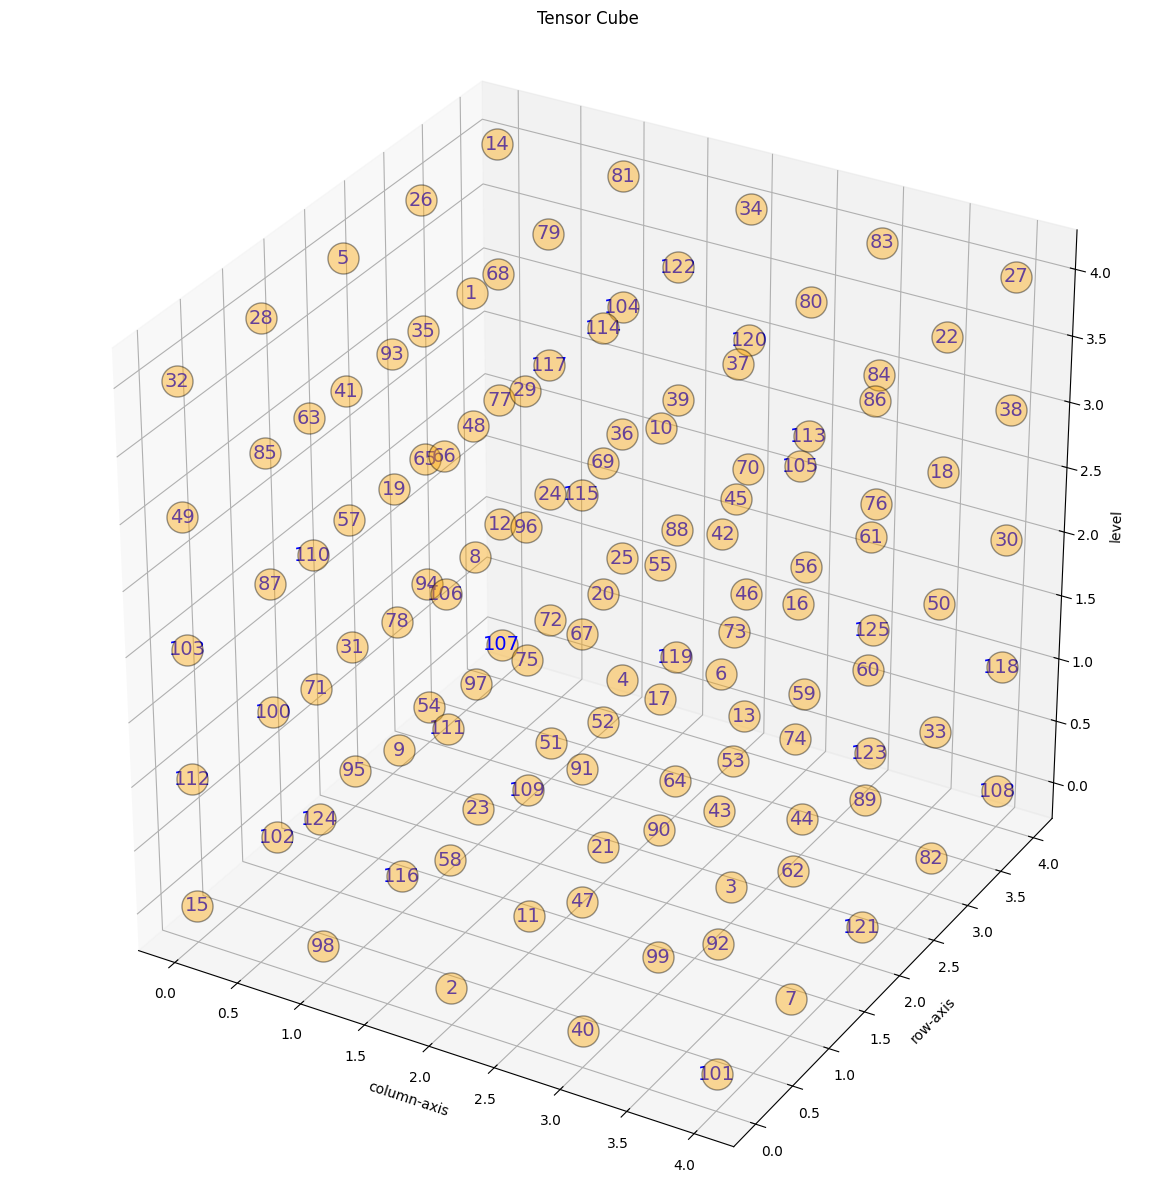

In [7]:
cube.plot_cube()

In [8]:
cube.print_tensor()

Level: 1

[ 15 102  95  54 107]
[ 98 116  23  51   4]
[ 2 11 21 64 13]
[ 40  99   3  44 123]
[101   7 121  82 108]

Level: 2

[112 100  31  94  12]
[124   9  97  72  25]
[ 58 109  52 119  46]
[ 47  90  53  59 125]
[ 92  62  89  33 118]

Level: 3

[103  87  57  65  77]
[71 78  8 24 36]
[111  75  20  88  70]
[91 17 73 56 76]
[43 74 60 50 30]

Level: 4

[49 85 41 35 68]
[110  19  48 117 104]
[106  96  69  39 120]
[ 67  55  45 113  84]
[ 6 16 61 18 38]

Level: 5

[32 28  5 26 14]
[63 93  1 79 81]
[ 66  29 114 122  34]
[115  10  37  80  83]
[ 42 105  86  22  27]



In [9]:
# cube.plot_per_level()

In [10]:
obj_func = cube.objective_function()
print(f"cube's objective function: {obj_func}")

cube's objective function: 521775.0


## Local Seach Implementation

### Steepest Ascent Hill-Climbing

In [11]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 21895.0


In [12]:
HC = Hill_climb(cube=cube)

Initial Value: 521775.0

Step 1: Choosen Neighbor Value: 388555.0; Best Value: 521775.0


In [13]:
HC.results()

+------------------------ RESULTS -------------------------+

    final step: 2

  final Value: 388555.000000

+-------------------------- END ---------------------------+


In [14]:
print(f"differences from ideal: {HC.best_value - obj_func_goal}")

differences from ideal: 366660.0


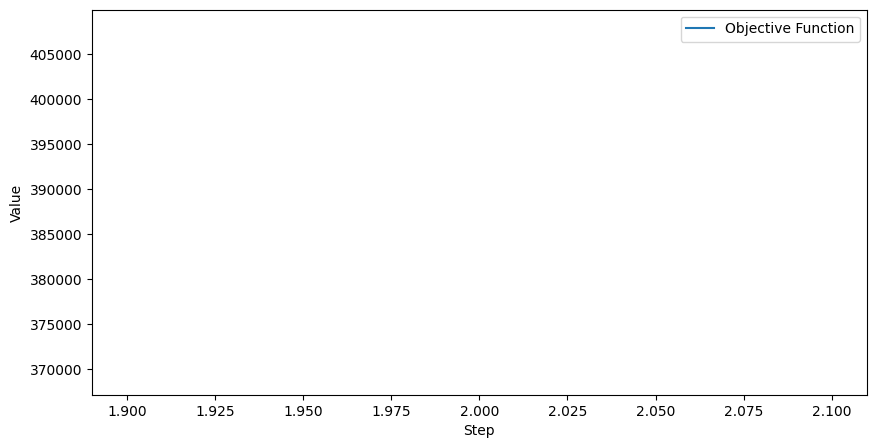

In [15]:
HC.hist_plot()

### Random Restart Hill-Climbing


In [16]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 21895.0


In [17]:
RR = Random_restart(cube=cube)

Initial Value: 521775.0

Restart: 1

Initial Value: 521775.0

Step 1: Choosen Neighbor Value: 407149.0; Best Value: 521775.0
Step 2: Choosen Neighbor Value: 392849.0; Best Value: 407149.0
Step 3: Choosen Neighbor Value: 380581.0; Best Value: 392849.0
Iteration Value: 380581.0

Best Value: 380581.0

Restart: 2

Initial Value: 521775.0

Step 1: Choosen Neighbor Value: 493080.0; Best Value: 521775.0
Step 2: Choosen Neighbor Value: 401227.0; Best Value: 493080.0
Iteration Value: 401227.0

Best Value: 380581.0

Restart: 3

Initial Value: 521775.0

Step 1: Choosen Neighbor Value: 434112.0; Best Value: 521775.0
Step 2: Choosen Neighbor Value: 365299.0; Best Value: 434112.0
Iteration Value: 365299.0

Best Value: 365299.0

Restart: 4

Initial Value: 521775.0

Step 1: Choosen Neighbor Value: 370569.0; Best Value: 521775.0
Iteration Value: 370569.0

Best Value: 365299.0

Restart: 5

Initial Value: 521775.0

Step 1: Choosen Neighbor Value: 420439.0; Best Value: 521775.0
Step 2: Choosen Neighbor Va

In [18]:
RR.results()

+------------------------ RESULTS -------------------------+

    Best iteration: 11

  final Value: 285230.000000

+-------------------------- END ---------------------------+


In [19]:
print(f"differences from ideal: {RR.best_value - obj_func_goal}")

differences from ideal: 263335.0


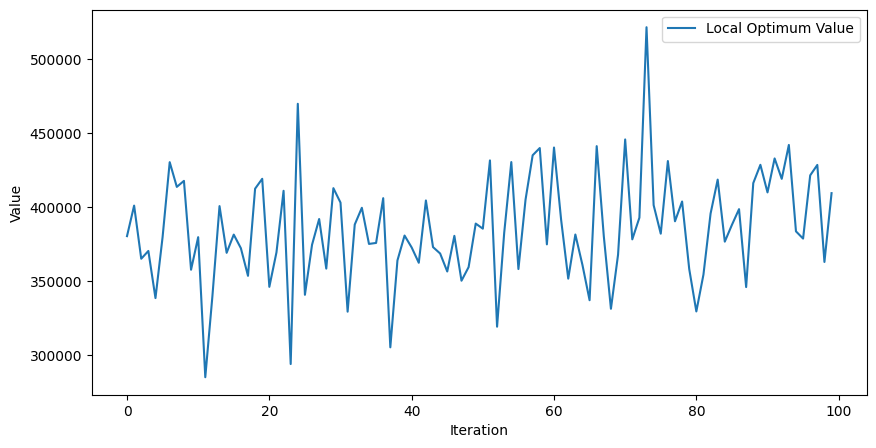

In [20]:
RR.hist_plot()

### Simulated Annealing

In [21]:
print(f"ideal objective function {goal_cube.objective_function()}")

ideal objective function 21895.0


In [22]:
SA = Simulated(cube=cube,tmax=10000,step_max=10000,cooling_schedule="quadratic",alpha=0.999)

Initial Energy: 521775.0

Step:1, Energy: 525111.0, Best Energy: 521775.0,Temperature: 10000

Step:2, Energy: 504591.0, Best Energy: 521775.0,Temperature: 5002.501250625312

Step:3, Energy: 506202.0, Best Energy: 504591.0,Temperature: 2001.6012810248196

Step:4, Energy: 505680.0, Best Energy: 504591.0,Temperature: 1000.9008107296568

Step:5, Energy: 504784.0, Best Energy: 504591.0,Temperature: 588.7894488930758

Step:6, Energy: 506809.0, Best Energy: 504591.0,Temperature: 384.98556304138594

Step:7, Energy: 518361.0, Best Energy: 504591.0,Temperature: 270.53349204631536

Step:8, Energy: 529091.0, Best Energy: 504591.0,Temperature: 200.19619226842306

Step:9, Energy: 521819.0, Best Energy: 504591.0,Temperature: 153.99778243193296

Step:10, Energy: 525539.0, Best Energy: 504591.0,Temperature: 122.0718026343095

Step:11, Energy: 524895.0, Best Energy: 504591.0,Temperature: 99.10802775024777

Step:12, Energy: 521388.0, Best Energy: 504591.0,Temperature: 82.04858917450915

Step:13, Energy: 

In [23]:
SA.results()

+------------------------ RESULTS -------------------------+

cooling sched.: quadratic multiplicative
  initial temp: 10000
    final temp: 0.00010010009909809711
    final step: 10001

  final energy: 321969.000000

+-------------------------- END ---------------------------+


In [24]:
print(f"differences from ideal: {SA.best_energy - obj_func_goal}")

differences from ideal: 300074.0


In [25]:
SA.best_energy

321969.0

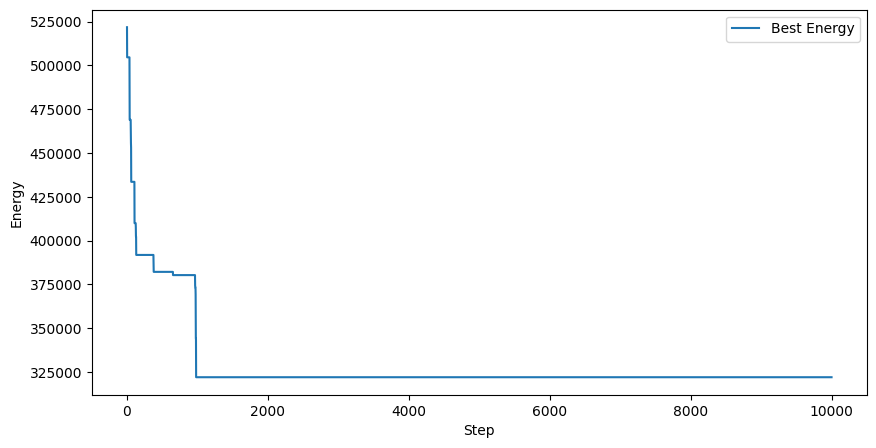

In [26]:
SA.hist_plot()

### Genetic Algorithm
